In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import re
import json
import pickle


In [2]:
def load_data(folder_name):
    # load the synthetic results as dataframes in the synthetic_results folder
    results = {}
    for filename in os.listdir(folder_name):
        if filename.endswith('.csv'):
            df = pd.read_csv(f'{folder_name}/' + filename)
            df.drop(columns=['Unnamed: 0'], inplace=True)
            results[filename[:-4]] = df
            
    return results

In [3]:
synthetic_results = load_data("synthetic_results")
temperature_results = load_data("temperature_results")
power_results = load_data("power_results")
google_results = load_data("google_results")
eurostox_results = load_data("eurostox_results")

In [4]:
def combine_arima_results(results_dict):
    """
    Combine the results of the arima models into a single dataframe.
    """
    arima_results = pd.DataFrame()
    for key in sorted(results_dict.keys(), key=lambda x: x[0].lower()):
        if "arima" in key:
            arima_results = pd.concat([arima_results, results_dict[key]], axis=0)
    arima_df = arima_results.groupby(arima_results.model_name).mean().reset_index()
    return arima_df

In [5]:
def combine_model_results(results_dict, model_name):
    """
    Combine the results of the models into a single dataframe.
    """
    model_results = pd.DataFrame()
    for key in sorted(results_dict.keys(), key=lambda x: x[0].lower()):
        if model_name in key:
            model_results = pd.concat([model_results, results_dict[key]], axis=0)
    model_df = model_results.groupby(model_results.model_name).mean().reset_index()
    return model_df

In [6]:
def concatenate_model_results(dataframes):
    """
    Concatenate the results of the models into a single dataframe.
    """
    model_results = pd.DataFrame()
    for df in dataframes:
        model_results = pd.concat([model_results, df], axis=0)
    model_df = model_results.groupby(model_results.model_name).mean().reset_index()
    return model_df


# Synthetic

In [7]:
# ARIMA results
df_arima_syn = combine_arima_results(synthetic_results)

# linear results
df_linear_syn = combine_model_results(synthetic_results, 'linear')

# forest results
df_forest_syn = combine_model_results(synthetic_results, 'forest')

# nn results
df_nn_syn = combine_model_results(synthetic_results, 'NN')

synthetic_results = {'arima': df_arima_syn, 'linear': df_linear_syn, 'forest': df_forest_syn, 'NN': df_nn_syn}
concatenate_model_results(synthetic_results.values())

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,5.860662,0.915000,19.582610,0.202281,0.792352
1,Forest ACI,6.416332,0.996111,37.814818,0.390613,0.461874
2,Forest CQR,6.416332,0.915000,22.338324,0.230747,0.763954
3,Forest EnCQR,6.380206,0.962778,106.965855,1.104918,-0.093216
4,Forest EnbPI,6.353832,0.953333,24.956029,0.257787,0.681477
5,Linear ACI,8.045551,0.996667,57.049297,0.589299,0.310298
6,Linear CQR,8.045551,0.856667,36.973091,0.381919,0.584225
7,Linear EnCQR,8.212838,1.000000,91.289444,0.942987,0.042236
8,Linear EnbPI,7.431642,0.945556,28.207327,0.291371,0.665844
9,NN ACI,7.039244,0.996667,52.266275,0.539892,0.347344


# Temperature

In [8]:
# ARIMA results
df_arima_temp = combine_arima_results(temperature_results)

# linear results
df_linear_temp = combine_model_results(temperature_results, 'linear')

# forest results
df_forest_temp = combine_model_results(temperature_results, 'forest')

# nn results
df_nn_temp = combine_model_results(temperature_results, 'NN')

temperature_results = {'arima': df_arima_temp, 'linear': df_linear_temp, 'forest': df_forest_temp, 'NN': df_nn_temp}
concatenate_model_results(temperature_results.values())

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,1.606266,0.900685,5.288756,0.187062,0.812926
1,Forest ACI,1.697652,0.995434,15.530218,0.549300,0.343010
2,Forest CQR,1.697652,0.896119,5.800852,0.205175,0.794027
3,Forest EnCQR,1.861915,1.000000,30.698909,1.085814,-0.063572
4,Forest EnbPI,1.744652,0.924658,6.527424,0.230874,0.755225
5,Linear ACI,1.686359,0.996575,18.176550,0.642900,0.269943
6,Linear CQR,1.686359,0.904110,5.781332,0.204484,0.795113
7,Linear EnCQR,1.679520,0.996575,28.072840,0.992930,0.005344
8,Linear EnbPI,1.682447,0.925799,6.526397,0.230837,0.753901
9,NN ACI,1.715994,0.996575,18.053404,0.638545,0.273235


# Power

In [9]:
# ARIMA results
df_arima_power = combine_arima_results(power_results)

# linear results
df_linear_power = combine_model_results(power_results, 'linear')

# forest results
df_forest_power = combine_model_results(power_results, 'forest')

# nn results
df_nn_power = combine_model_results(power_results, 'NN')

power_results = {'arima': df_arima_power, 'linear': df_linear_power, 'forest': df_forest_power, 'NN': df_nn_power}
concatenate_model_results(power_results.values())

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,663.339805,0.939655,2393.433516,0.724454,0.262849
1,Forest ACI,711.003340,0.948276,3448.568685,1.043826,-0.041523
2,Forest CQR,711.003340,0.925287,2977.388590,0.901208,0.096247
3,Forest EnCQR,736.736784,0.747126,3115.941548,0.943146,0.024990
4,Forest EnbPI,700.800586,0.974138,3070.832886,0.929492,0.059790
5,Linear ACI,636.302002,0.974138,2564.368652,0.776193,0.189785
6,Linear CQR,636.302002,0.931034,2258.008301,0.683463,0.307522
7,Linear EnCQR,682.068007,0.525862,1134.019097,0.343249,0.009855
8,Linear EnbPI,638.693018,0.954023,2528.840444,0.765439,0.214798
9,NN ACI,802.297570,0.948276,3803.983805,1.151405,-0.139839


# Google

In [10]:
# ARIMA results
df_arima_google = combine_arima_results(google_results)

# linear results
df_linear_google = combine_model_results(google_results, 'linear')

# forest results
df_forest_google = combine_model_results(google_results, 'forest')

# nn results
df_nn_google = combine_model_results(google_results, 'NN')

google_results = {'arima': df_arima_google, 'linear': df_linear_google, 'forest': df_forest_google, 'NN': df_nn_google}
concatenate_model_results(google_results.values())

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,9.864323,0.786424,21.605640,0.045715,0.648056
1,Forest ACI,9.841158,0.989514,174.468760,0.369152,0.496051
2,Forest CQR,9.841158,0.845475,25.820477,0.054633,0.864496
3,Forest EnCQR,9.969048,1.000000,236.790122,0.501016,0.369657
4,Forest EnbPI,10.075230,0.834437,26.207792,0.055452,0.829868
5,Linear ACI,9.989641,0.991722,195.521957,0.413698,0.455524
6,Linear CQR,9.989641,0.751656,36.397991,0.077013,0.476960
7,Linear EnCQR,9.894384,0.993377,307.685055,0.651020,0.268657
8,Linear EnbPI,9.878219,0.842715,25.757949,0.054500,0.856816
9,NN ACI,11.615319,0.992826,190.113505,0.402254,0.461619


# Eurostox

In [11]:
# ARIMA results
df_arima_eurostox = combine_arima_results(eurostox_results)

# linear results
df_linear_eurostox = combine_model_results(eurostox_results, 'linear')

# forest results
df_forest_eurostox = combine_model_results(eurostox_results, 'forest')

# nn results
df_nn_eurostox = combine_model_results(eurostox_results, 'NN')

eurostox_results = {'arima': df_arima_eurostox, 'linear': df_linear_eurostox, 'forest': df_forest_eurostox, 'NN': df_nn_eurostox}
concatenate_model_results(eurostox_results.values())

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,49.229724,0.869403,141.374445,0.069892,0.904350
1,Forest ACI,48.859403,0.987562,630.998800,0.311948,0.546648
2,Forest CQR,48.859403,0.811360,124.586327,0.061592,0.741132
3,Forest EnCQR,52.449354,1.000000,3302.719777,1.632771,-0.468768
4,Forest EnbPI,48.920858,0.912521,166.372316,0.082250,0.913435
5,Linear ACI,49.047949,0.983831,644.673340,0.318708,0.551787
6,Linear CQR,49.047949,0.796020,114.689484,0.056699,0.682000
7,Linear EnCQR,48.975802,1.000000,2393.405156,1.183232,-0.135741
8,Linear EnbPI,48.970793,0.911692,163.830789,0.080993,0.915246
9,NN ACI,52.885551,0.983831,665.611369,0.329059,0.543372


# Create plots

In [12]:
for k, v in eurostox_results.items():
    display(v)

,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,ARIMA,49.229724,0.869403,141.374445,0.069892,0.90435


,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,Linear ACI,49.047949,0.983831,644.673340,0.318708,0.551787
1,Linear CQR,49.047949,0.796020,114.689484,0.056699,0.682000
2,Linear EnCQR,48.975802,1.000000,2393.405156,1.183232,-0.135741
3,Linear EnbPI,48.970793,0.911692,163.830789,0.080993,0.915246


,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,Forest ACI,48.859403,0.987562,630.998800,0.311948,0.546648
1,Forest CQR,48.859403,0.811360,124.586327,0.061592,0.741132
2,Forest EnCQR,52.449354,1.000000,3302.719777,1.632771,-0.468768
3,Forest EnbPI,48.920858,0.912521,166.372316,0.082250,0.913435


,model_name,RMSE,PICP,PIAW,PINAW,CWC
0,NN ACI,52.885551,0.983831,665.611369,0.329059,0.543372
1,NN CQR,52.885551,0.844527,156.660014,0.077448,0.840771
2,NN EnCQR,49.318192,1.000000,995.958495,0.492374,0.376059
3,NN EnbPI,49.499766,0.914594,168.457693,0.083281,0.910844


In [13]:
picp_column_idx = 2
piaw_column_idx = 3

In [14]:
def get_picp_versus_piaw(results_dict, picp_column_idx, piaw_column_idx):
    df_linear = results_dict['linear']
    df_forest = results_dict['forest']
    df_nn = results_dict['NN']
    
    picp_piaw = {}
    
    # alphabetical order
    methods = ["ACI", "CQR", "EnCQR", "EnbPI"]
    picp_piaw = {}
    
    for i, method in enumerate(methods):
        picp_piaw[method] = {}
        picp_piaw[method]["LR"] = df_linear[df_linear["model_name"] == f"Linear {method}"].iloc[0, [picp_column_idx, piaw_column_idx]].to_numpy()    
        picp_piaw[method]["RF"] = df_forest[df_forest["model_name"] == f"Forest {method}"].iloc[0, [picp_column_idx, piaw_column_idx]].to_numpy()    

        picp_piaw[method]["NN"] = df_nn[df_nn["model_name"] == f"NN {method}"].iloc[0, [picp_column_idx, piaw_column_idx]].to_numpy()    
    return picp_piaw
        
    

In [15]:
# create 5 subplots


In [16]:
def plot_PIAW_versus_PICP(all_results, figsize=(20, 3)):
    assert len(all_results) > 0, "There should be at least 1 dataset"
    
    fig, axs = plt.subplots(1, len(all_results), figsize=figsize)
    
    if len(all_results) > 1:
        # TITLE
        fig.suptitle("PICP vs PIAW")
    
    best_coordinate = (0, 0)

    for i, (dataset, results) in enumerate(all_results.items()):
        picp_versus_piaw = get_picp_versus_piaw(results, picp_column_idx, piaw_column_idx)
        CQR = picp_versus_piaw["CQR"]
        ACI = picp_versus_piaw["ACI"]
        ENBPI = picp_versus_piaw["EnbPI"]
        ENCQR = picp_versus_piaw["EnCQR"]
        
        ax = axs[i] if len(all_results) > 1 else axs

        # plot data on the figure

        # PICP and PIAW scores
        
        # markers
        markers = {"LR" : "*", "RF" : "^", "NN" : "s"}

        legends_mark = []
        legends_name = []
        # plot the data
        for j, (model, marker) in enumerate(markers.items()):
            a = ax.scatter(CQR[model][0],CQR[model][1], marker=marker,  color='lightblue', linewidth=3)
            b = ax.scatter(ACI[model][0],ACI[model][1], marker=marker, color='tomato', linewidth=3)
            c = ax.scatter(ENBPI[model][0],ENBPI[model][1], marker=marker, color='gold', linewidth=3)
            d = ax.scatter(ENCQR[model][0],ENCQR[model][1], marker=marker, color='green', linewidth=3)
            
            # red_patch = mpatches.Patch(color='red', label='The red data')
            legends_mark.append([a, b, c, d])
            legends_name.append([f"{model}-CQR", f"{model}-ACI", f"{model}-EnbPI", f"{model}-EnCQR"])
            
        
        # AX LABELS
        ax.set_xlabel('PICP')
        ax.set_ylabel('PIAW')
        
        ax.set_title(dataset)


        # TICKS
        # ax.set_xticks(np.arange(0.7, 1.05, 0.1))


        # Shrink current axis by 20%
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])



    
    # LEGEND
    legends_mark = np.array(legends_mark).T.flatten()
    legends_name = np.array(legends_name).T.flatten()
    # Put a legend to the right of the current axis
    plt.legend(legends_mark, legends_name, ncol=4, loc='center', bbox_to_anchor=(0.5, -0.25))
    
    
    fig.tight_layout()

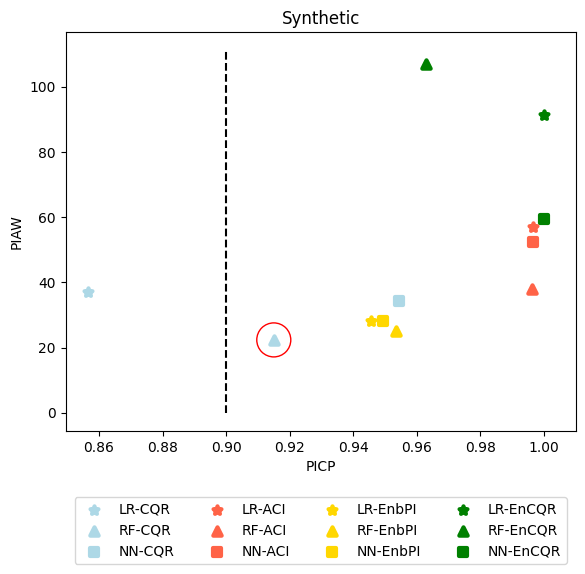

In [25]:
plot_PIAW_versus_PICP({"Synthetic" : synthetic_results}, figsize=(6, 6))
plt.scatter(0.915000 , 22.338324, s=600, facecolors='none', edgecolors='r')
ax = plt.gca()
maximum = ax.get_ylim()[1]
ax.set_xlim(right=1.01)
plt.vlines(0.9, 0, maximum, colors='k', linestyles='dashed', label='PICP=0.9')


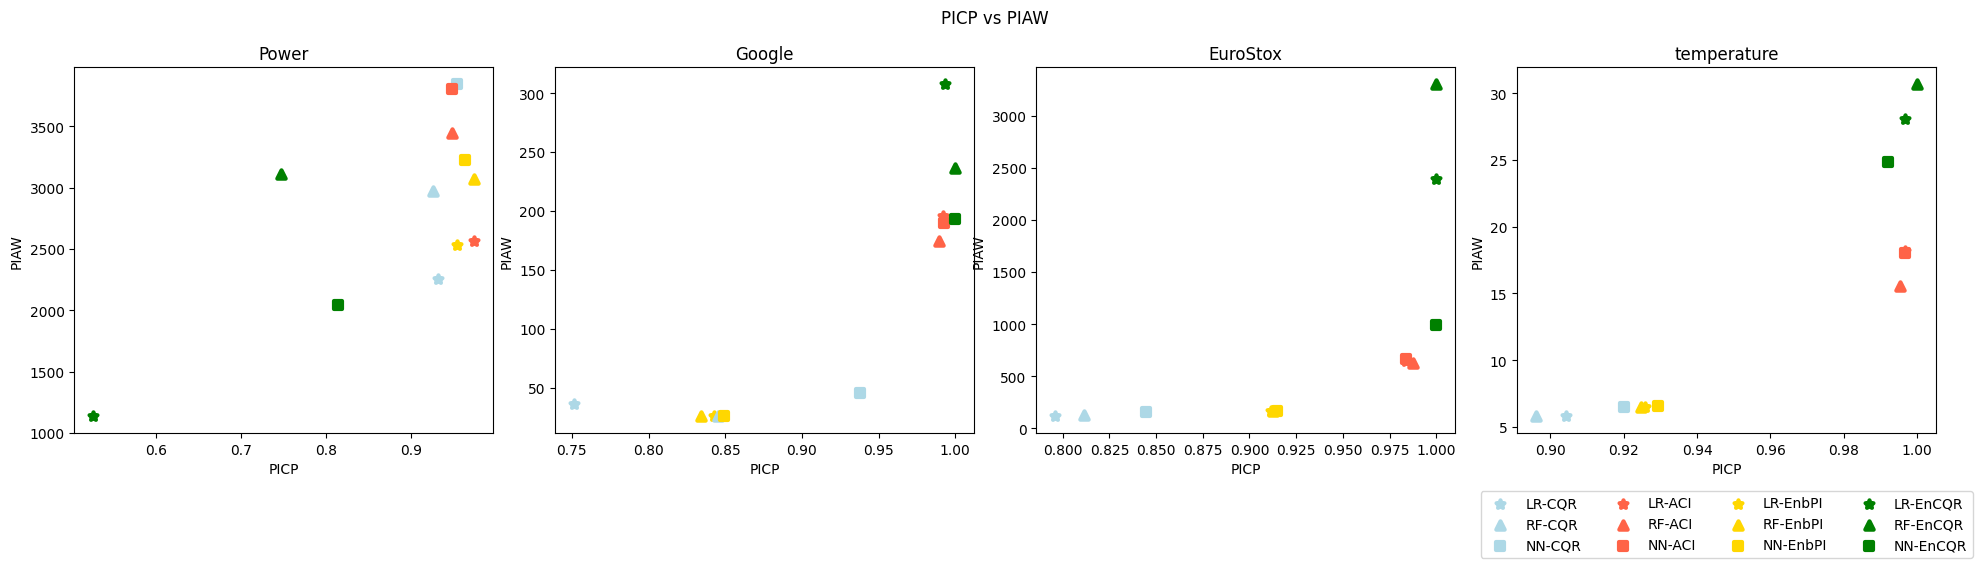

In [19]:
plot_PIAW_versus_PICP({"Power": power_results, "Google": google_results, "EuroStox": eurostox_results,
                       "temperature": temperature_results}, figsize=(20,6))


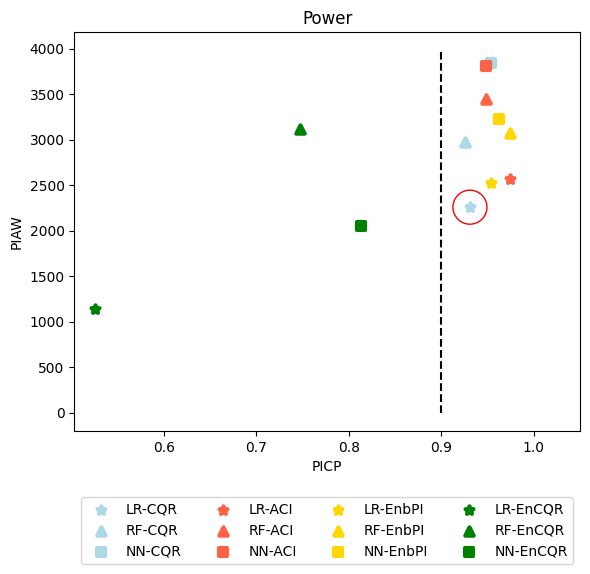

In [21]:
plot_PIAW_versus_PICP({"Power" : power_results}, figsize=(6, 6))
plt.scatter(0.931034, 2258.008301, s=600, facecolors='none', edgecolors='r')
ax = plt.gca()
maximum = ax.get_ylim()[1]
ax.set_xlim(right=1.05)
plt.vlines(0.9, 0, maximum, colors='k', linestyles='dashed', label='PICP=0.9')

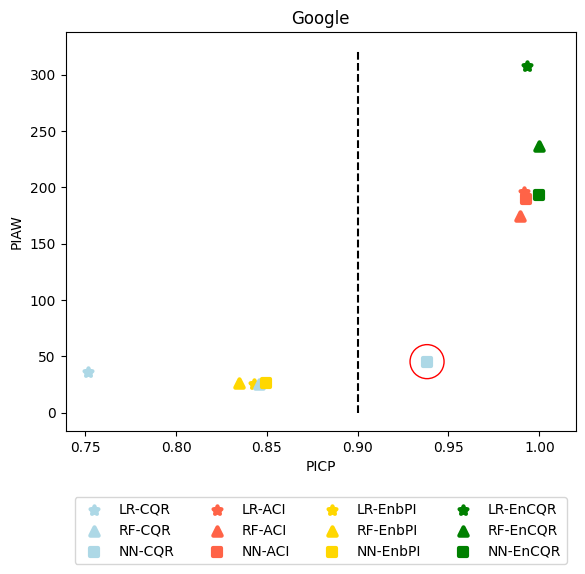

In [28]:
plot_PIAW_versus_PICP({"Google" : google_results}, figsize=(6, 6))
plt.scatter(0.938190, 45.344037, s=600, facecolors='none', edgecolors='r')
ax = plt.gca()
maximum = ax.get_ylim()[1]
ax.set_xlim(right=1.02)
plt.vlines(0.9, 0, maximum, colors='k', linestyles='dashed', label='PICP=0.9')

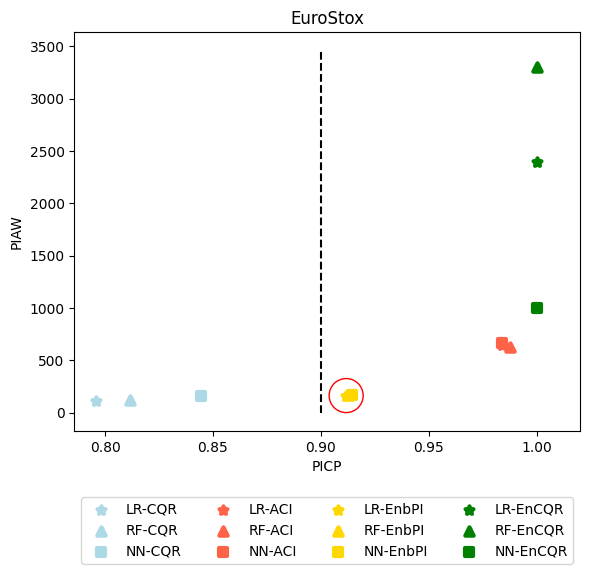

In [29]:
plot_PIAW_versus_PICP({"EuroStox" : eurostox_results}, figsize=(6, 6))
plt.scatter(0.911692, 163.830789, s=600, facecolors='none', edgecolors='r')
ax = plt.gca()
maximum = ax.get_ylim()[1]
ax.set_xlim(right=1.02)
plt.vlines(0.9, 0, maximum, colors='k', linestyles='dashed', label='PICP=0.9')

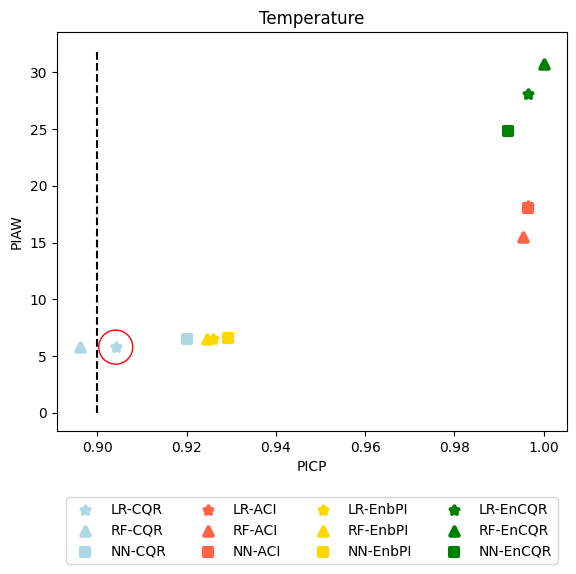

In [73]:
plot_PIAW_versus_PICP({"Temperature" : temperature_results}, figsize=(6, 6))
plt.scatter(0.904110, 5.782, s=600, facecolors='none', edgecolors='r')
ax = plt.gca()
maximum = ax.get_ylim()[1]
plt.vlines(0.9, 0, maximum, colors='k', linestyles='dashed', label='PICP=0.9')

# For the table

In [75]:
for dataset, results in synthetic_results.items():
    print(dataset)
    print(results)

arima
  model_name      RMSE   PICP      PIAW     PINAW       CWC
0      ARIMA  5.860662  0.915  19.58261  0.202281  0.792352
linear
     model_name      RMSE      PICP       PIAW     PINAW       CWC
0    Linear ACI  8.045551  0.996667  57.049297  0.589299  0.310298
1    Linear CQR  8.045551  0.856667  36.973091  0.381919  0.584225
2  Linear EnCQR  8.212838  1.000000  91.289444  0.942987  0.042236
3  Linear EnbPI  7.431642  0.945556  28.207327  0.291371  0.665844
forest
     model_name      RMSE      PICP        PIAW     PINAW       CWC
0    Forest ACI  6.416332  0.996111   37.814818  0.390613  0.461874
1    Forest CQR  6.416332  0.915000   22.338324  0.230747  0.763954
2  Forest EnCQR  6.380206  0.962778  106.965855  1.104918 -0.093216
3  Forest EnbPI  6.353832  0.953333   24.956029  0.257787  0.681477
NN
  model_name      RMSE      PICP       PIAW     PINAW       CWC
0     NN ACI  7.039244  0.996667  52.266275  0.539892  0.347344
1     NN CQR  7.039244  0.954444  34.175969  0.353025 